# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Joost Bambacht
### ID : 4025016

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

1. pip3 install -r requirements.txt
2. Place "data_for_student_case.csv" in the same folder
3. Run code fragment below once to initialize the classes and dataset
4. Run the code fragment for each task separately

In [2]:
%load_ext autoreload
%autoreload 2

import visualisation as visual
import imbalanced as imb

data = imb.load_data("data_for_student_case.csv")

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

Figure 1: Shopper interaction


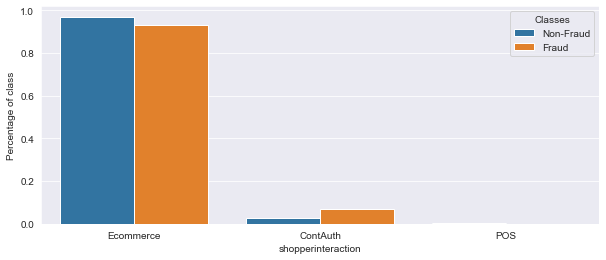

Figure 2: Card types


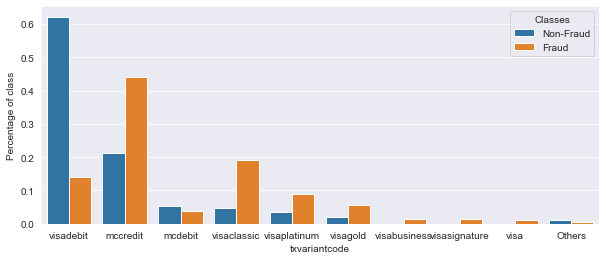

Figure 3,4,5: Countries and currencies


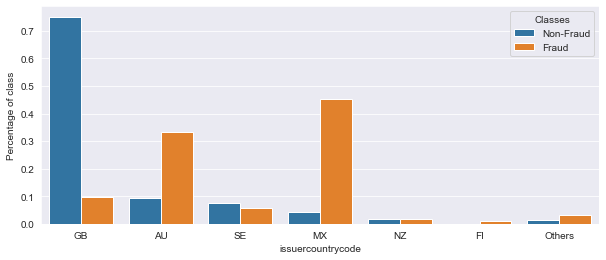

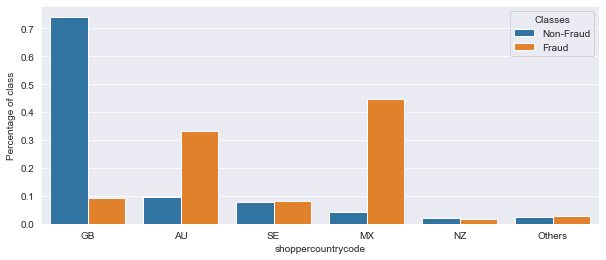

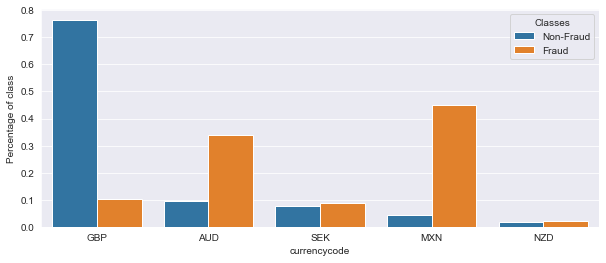

Figure 6,7: Heatmaps 'Currency code' vs 'Card type used' (all transactions vs fraud transactions)


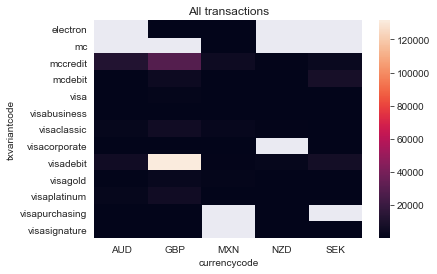

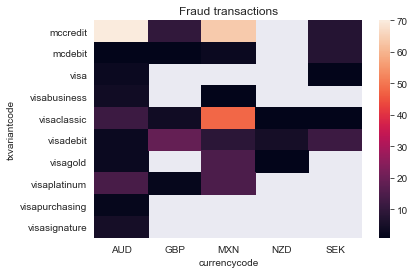

Figure 8: CVC Response Code


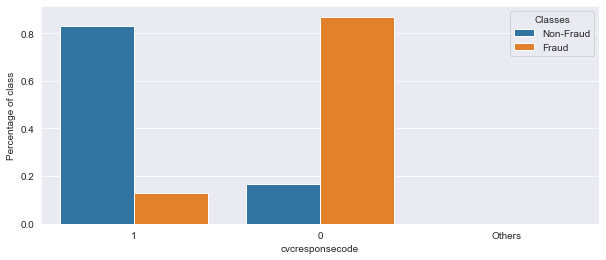

In [83]:
# Obtain and process data
pdata = visual.pre_process(data)
pdata_fraud = visual.get_fraud_data(pdata)
pdata_nonfraud = visual.get_nonfraud_data(pdata)

print("Figure 1: Shopper interaction")
visual.get_bar_plot(pdata, "shopperinteraction",0)

print("Figure 2: Card types")
visual.get_bar_plot(pdata, "txvariantcode",0.01)

print("Figure 3,4,5: Countries and currencies")
visual.get_bar_plot(pdata, "issuercountrycode",0.01)
visual.get_bar_plot(pdata, "shoppercountrycode",0.01)
visual.get_bar_plot(pdata, "currencycode",0)

print("Figure 6,7: Heatmaps 'Currency code' vs 'Card type used' (all transactions vs fraud transactions)")
visual.get_heatmap(pdata,pdata_fraud, "txvariantcode","currencycode")

print("Figure 8: CVC Response Code")
pdata_cvc = pdata.loc[pdata["cardverificationcodesupplied"] == True]
visual.get_bar_plot(pdata_cvc, "cvcresponsecode",0.01)

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

At first we thought that the features containing ids would be valuable to use, but after reviewing the numbers we concluded that not a lot could be done with it rather than adding them to the blacklist. Reviewing the numbers for mail_id, ip_id, and card_id we can see that only the ip_id contains one ip that is used more than 5 times for the fraudulent cases. If there are multiple occurrences, they are all used in matter of days, always using the same currency and country as the first occurence, and sometimes switching the mail_id, ip_id and/or card_id. The majority of the fraudulent cases are those that occur once, and not been re-used.

If we look at other features we for instance find that both the Ecommerce and ContAuth are equally distributed for both classes, while POS is neglectible, see Figure 1. This indicates that if the method is a (monthly) subscription or a point of sale, it is not very likely to be fraudulent. 

The card types used clearly indicates that non-fraud transactions are mostly done by a visa debit card, while the mccredit card is used most for fraud cases, see Figure 2. We can therefore conclude that if a mccredit card is used, the probability of being fraud is higher than other cards.

Issuer country looks like to be linked to the shopper country and currency of the transaction since it follows the same pattern, see Figure 3, 4, and 5. This if of course quite obvious since a user often inquiries a card in the country he's living, using the country's currency. What interesting to see is that the non-fraudulent transactions are mostly done in Great Brittain (currency GBP). If we look at the fraud cases, most transactions are submitted from Mexico (with currency MXN) and Australia (with currency AUD). The other countries and currencies are not worth mentioning. 

In Figure 6 and 7 the relation between the currency used and card type used has been made by means of heatmaps. For the first heatmap all (pre-processed) data has been used, while the second heatmap only considers the fraudulent transactions. Again, the GBP (British pound) is the prominent currency used, which we also noticed in Figure 5. This heatmap additionally shows which card types are most used for each currency, which is in case of the GBP clearly is the visadebit card. The heatmap for all transactions furthermore does not include a lot of insights. If we look at the heatmap for only the fraud transactions we get a totally different view. We see that the mccredit card in combination with the AUD and MXN as currency are clearly most used, and that the MXN is also used often in combination with a visaclassic card. This means that these combinations of cards and currencies should be considered with a higher weight in fraud detection. It is also worth mentioning that the GBP in combination with a visadebit is used no more than average, meaning that GBP in combination with a visadebit card needs other measures to distinguish from a benign transaction.

We can also look at the difference between the CVC response codes in Figure 8. From all transactions in which a CVC code was supplied, almost all responses match the correct response in the non-fraudulent cases and a very small number for the fraud cases (these cards are probably hacked because the CVC is known). For the unknown response code we see the opposite: almost all fraudulent transactions have an unknown CVC response code, probably because the card is tested to be functioning without CVC code. The non-fraudulent transactions transcations contains a small amount of occurences, in which the actual user probably forgot to insert the CVC code.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

Total: 237036
Non-Fraud: 236691 = 99.8545%
Fraud: 345 = 0.1455%

KNN UNSMOTEd:
Accuracy: 0.9982421847534136
Precision: 0.07692307692307693
Recall: 0.008771929824561403
F1: 0.015748031496062992

KNN SMOTEd:
Accuracy: 0.9909952672800123
Precision: 0.4627906976744186
Recall: 0.32463295269168024
F1: 0.38159156279961653



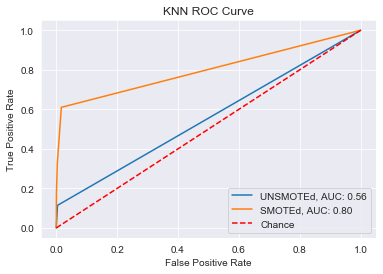

QuadraticDiscriminantAnalysis UNSMOTEd:
Accuracy: 0.9553796177806528
Precision: 0.015521064301552107
Recall: 0.4298245614035088
F1: 0.029960256802201164

QuadraticDiscriminantAnalysis SMOTEd:
Accuracy: 0.9726786636697426
Precision: 0.14519535374868003
Recall: 0.44861337683523655
F1: 0.21938571998404466



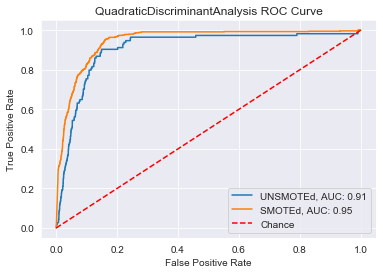

RandomForest UNSMOTEd:
Accuracy: 0.9985234351928675
Precision: 0.8461538461538461
Recall: 0.09649122807017543
F1: 0.1732283464566929

RandomForest SMOTEd:
Accuracy: 0.9970542657303606
Precision: 0.969626168224299
Recall: 0.6769983686786297
F1: 0.7973102785782901



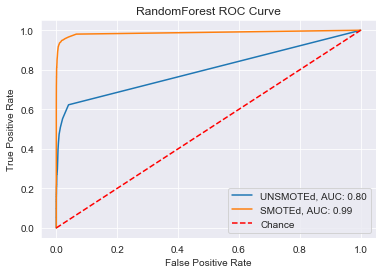

DecisionTree UNSMOTEd:
Accuracy: 0.9972015581274346
Precision: 0.16
Recall: 0.17543859649122806
F1: 0.16736401673640167

DecisionTree SMOTEd:
Accuracy: 0.9956302614862695
Precision: 0.7373417721518988
Recall: 0.7601957585644372
F1: 0.7485943775100402



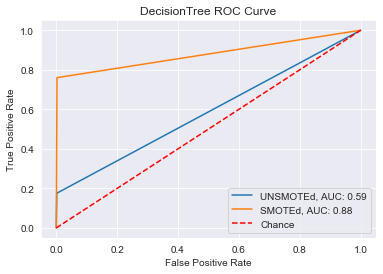

In [10]:
pdata = imb.pre_process(data)
imb.describe_data(pdata)
N = 5
test_size_ratio = 0.3

# Get UNSMOTEd datasets by splitting the thuth class from the features dataset
X_UNSMOTEd, y_UNSMOTEd = imb.get_X_y(pdata)

# SMOTE the minority class, will grow by N times.  
X_SMOTEd, y_SMOTEd = imb.smote_dataset(X_UNSMOTEd, y_UNSMOTEd, N)

# Create train and test sets for UNSMOTEd and SMOTEd data sets
X_train_UNSMOTEd, X_test_UNSMOTEd, y_train_UNSMOTEd, y_test_UNSMOTEd = imb.train_test(X_UNSMOTEd, y_UNSMOTEd,test_size_ratio)
X_train_SMOTEd, X_test_SMOTEd, y_train_SMOTEd, y_test_SMOTEd = imb.train_test(X_SMOTEd, y_SMOTEd,test_size_ratio)

# Classifiers to include.
# Choose out of: KNN, RandomForest, NaiveBayes, SupportVectorMachines, LogisticRegression, DecisionTree, LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
classifiers = ["KNN","QuadraticDiscriminantAnalysis","RandomForest","DecisionTree"]

# For each classifier we classify the UNSMOTEd and SMOTEd dataset, display performances, 
# and plot results of both UNSMOTEd and SMOTEd
for clf in classifiers:
    clf_UNSMOTEd, predicted_UNSMOTEd, predicted_proba_UNSMOTEd = imb.classify(clf, X_train_UNSMOTEd, y_train_UNSMOTEd, X_test_UNSMOTEd)
    clf_SMOTEd, predicted_SMOTEd, predicted_proba_SMOTEd = imb.classify(clf, X_train_SMOTEd, y_train_SMOTEd, X_test_SMOTEd)
    
    imb.get_performance(clf_UNSMOTEd, predicted_UNSMOTEd, y_test_UNSMOTEd, clf+" UNSMOTEd")
    imb.get_performance(clf_SMOTEd, predicted_SMOTEd, y_test_SMOTEd, clf+" SMOTEd")
    
    imb.plot_roc(y_test_UNSMOTEd, predicted_proba_UNSMOTEd, y_test_SMOTEd, predicted_proba_SMOTEd, clf, True)

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

As can be seen above, the fraud transactions are in an extremely minority compared to the benign transactions. The classifier would not be able to correctly classify (detect) a lot of the fraud transactions because there are not enough samples to learn from (undersampling). To increase the number of samples from the minority class, we can apply SMOTE, which create new samples using the current samples by calculating the k nearest neighbors. It then creates new points based on a number of random nearest neighbors. For this exercise the fraud dataset is 6 times its original size.

The following four classifiers (two of both classification and regression models) has been chosen to see if SMOTE is effective: kNN, Quadratic Discriminant Analysis, Random Forest, Decision Tree. After applying SMOTE to the dataset, we see a decrease in accuracy for each model, which is of course expected due to the oversampled majority class (99.85%). The accuracy is in these cases not important since we can achieve a high accuracy by simply classifying each sample to the majority class. In these situations the precision and recall are metrics that can be used. We see that that for each classifier the use of the SMOTEd datasets increased the performance of both metrics, mostly by some margin. 

If we now take a look at the ROC curve plots we can also see some differences in performance. When applying SMOTE to the kNN classifier the true positive rate increasing a lot when there's almost no increase of the false positive rate. The Qaudratic Discriminant Analysis Classifier however only slightly increases in TPR for the same FPR. The QDA classifier was already performing well, in which it thus is harder to gain even more performance. The RandomForest classifier has a substantial increase in TPR, while maintaining somewhat the same FPR. The Decrision Tree classifier has the same kind of pattern as the kNN, although its performance increase is a bit higher. These increases in TPR while maintaining somewhat the same FPR increases the total area under curve, which is the total measure of increase/decrease in TPR and FPR. For all classifiers the AUC is substantial due to the application of SMOTE, although the increase in AUC for the QDC classifier was marginal (probably because it already had a high value).

From the results (precision, recall, auc and roc curve) we must conclude that the performance increase obtained for the regression methods compared to the classification methods are more significant. The overall increase of the Decision Tree classifier is bigger than the Random Forest classifier. However the overall performance of the Random Forest classifier was already at a much higher level than the Decision Tree classifier before applying SMOTE. If we must choose one classifier which performs best under the addition of SMOTE, we would choose the Random Forest classifier because its performance is getting close to best. 

### 2c. Is using SMOTE a good idea? Why (not)?

If we look at the classifiers used for analysing the performance we must conclude that the use of SMOTE is a good idea since it does increase the precision and recall (measured together in the F1 score), auc, and ROC curve. Every classifier (and probably also different sort of data) does react differently on SMOTE, thus choice for applying SMOTE its effect must be analysed on beforehand. 

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below